<a href="https://colab.research.google.com/github/Dhruv-cs50/Black-bafoon/blob/master/Cardiovascular_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Diseases and the effects on People by analysis and visualization based on the patient**

###By Dhruv Punit Shah

The term "heart disease" is often used interchangeably with the term "cardiovascular disease". Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart’s muscle, valves or rhythm, also are considered forms of heart disease. Our research investigates several factors that affect cardiovascular health by looking at a dataset of patients.


**Data**

*age*: The person's age in years

*sex*: The person's sex

*chest_pain*: The chest pain experienced

*resting_bp*: The person's resting blood pressure

*cholesterol*: The person's cholesterol measurement in mg/dl

*fasting_blood_sugar*: Blood sugar levels on fasting > 120 mg/dl. (1=true, 0=false)

*rest_ecg*: Resting
electrocardiographic measurement (0 : Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV), 2: showing probable or definite left ventricular hypertrophyby Estes' criteria)

*thalach*: The person's maximum heart rate achieved

*exang*: Exercise induced angina (1 = yes; 0 = no)

*oldpeak*: ST depression induced by exercise relative to rest

*slope*: ST segment measured in terms of slope during peak exercise. (0: up sloping; 1: flat; 2: down sloping)

*thalassemia*: A blood disorder called thalassemia (0: NULL, 1: normal blood flow, 2: fixed defect (no blood flow in some part of the heart), 3: reversible defect (a blood flow is observed but it is not normal)
heart_disease: Heart disease (0 = no, 1 = yes)

**Questions**

1. What are the major factors that lead to heart diseases?
2. Is there a correlation between cholesterol and age, what type of correlation do they have?
3. Is there a significant difference in maximum heart rate achieved (thalach) between individuals with and without heart disease?


***Methods***

1.Hypothesis testing- The purpose of a hypothesis test is to help us learn whether random chance might be responsible for an observed effect.

2.T-test- T is the differences between sample means divided by the standard error of sample means.

3.P-value - The p value tells us how likely it is that our data could have occurred under the null hypothesis.

4.Correlation- The Pearson correlation is used to measure the strength and direction of a linear relationship between two quantitative variables.

PART 1:

Creating a DataFrame using pandas and loading the data into the Dataframe



In [ ]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/csbfx/cs22a/main/heart.csv'
heart_df = pd.read_csv(data_url)
print(heart_df.head())
print(heart_df.describe())
print(heart_df.info())
data_url

   age  sex  chest_pain  resting_bp  cholesterol  fasting_blood_sugar  \
0   63    1           3         145          233                    1   
1   37    1           2         130          250                    0   
2   41    0           1         130          204                    0   
3   56    1           1         120          236                    0   
4   57    0           0         120          354                    0   

   rest_ecg  thalachh  exng  oldpeak  slope  num_major_vessels  thalassemia  \
0         0       150     0      2.3      0                  0            1   
1         1       187     0      3.5      0                  0            2   
2         0       172     0      1.4      2                  0            2   
3         1       178     0      0.8      2                  0            2   
4         1       163     1      0.6      2                  0            2   

   heart_disease  
0              1  
1              1  
2              1  
3         

'https://raw.githubusercontent.com/csbfx/cs22a/main/heart.csv'

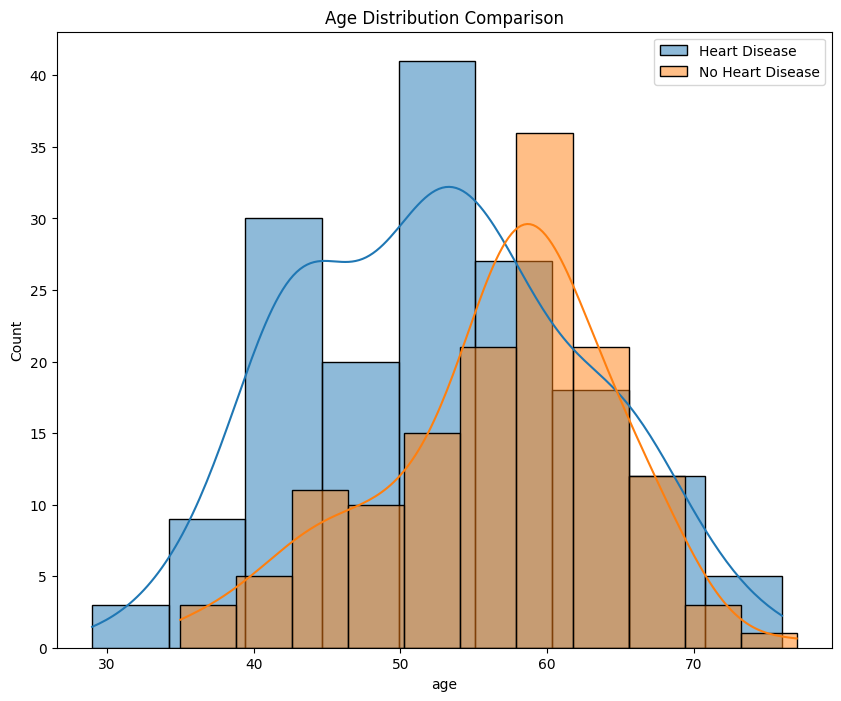

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

with_heart_disease = heart_df[heart_df['heart_disease'] == 1]
without_heart_disease = heart_df[heart_df['heart_disease'] == 0]

plt.figure(figsize=(10, 8))
sns.histplot(with_heart_disease['age'], label='Heart Disease', kde=True)
sns.histplot(without_heart_disease['age'], label='No Heart Disease', kde=True)
plt.title('Age Distribution Comparison')
plt.legend()
plt.show()



The figure above shows the relationship between age and heart diseases. It shows the lines of best fit for both the histograms. The graphs are made using seaborn. Most of the patients in the age group of 50-65 years are more prone to heart diseases.

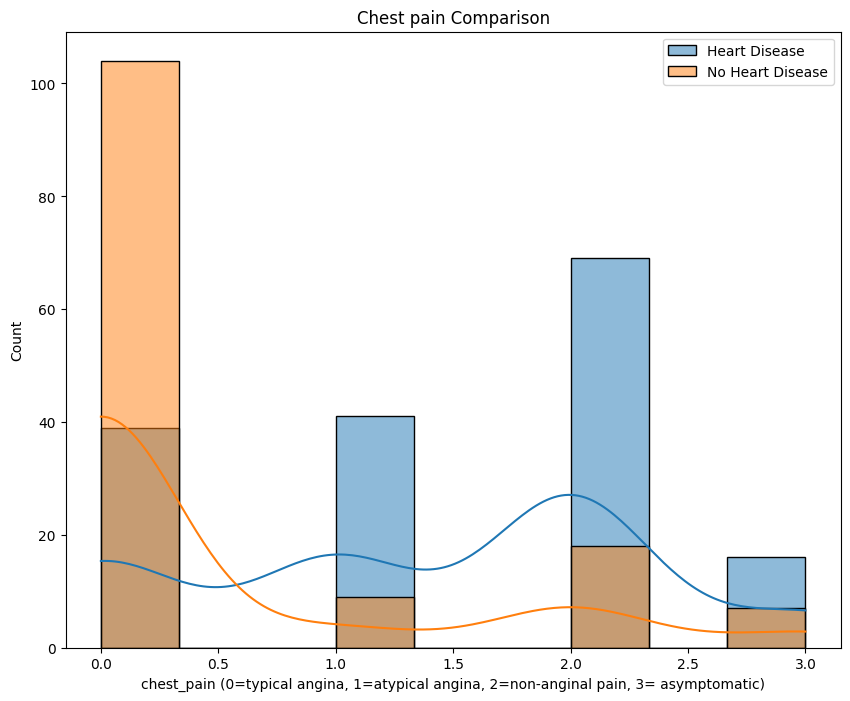

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(with_heart_disease['chest_pain'], label='Heart Disease', kde=True)
sns.histplot(without_heart_disease['chest_pain'], label='No Heart Disease', kde=True)
plt.title('Chest pain Comparison')
plt.xlabel('chest_pain (0=typical angina, 1=atypical angina, 2=non-anginal pain, 3= asymptomatic)')
plt.legend()
plt.show()

The histogram depicts the patients with 4 different types of chest pain. Patients with no heart diseases mostly suffer with typical angina. The patients with heart diseases normally suffer with Type 1,2 (usually), 3. The line of best fit for no heart diseases shows a decreasing trend whereas for heart disease it is variable

In [ ]:
contingency_table = pd.crosstab(heart_df['chest_pain'], heart_df['heart_disease'])

# Display the contingency table
print(contingency_table)

heart_disease    0   1
chest_pain            
0              104  39
1                9  41
2               18  69
3                7  16


In [ ]:
t_stat, p_value = ttest_ind(with_heart_disease['age'], without_heart_disease['age'])
print(f"T-test for Age - T-statistic: {t_stat}, P-value: {p_value}")

T-test for Age - T-statistic: -4.014560975148874, P-value: 7.524801303442373e-05


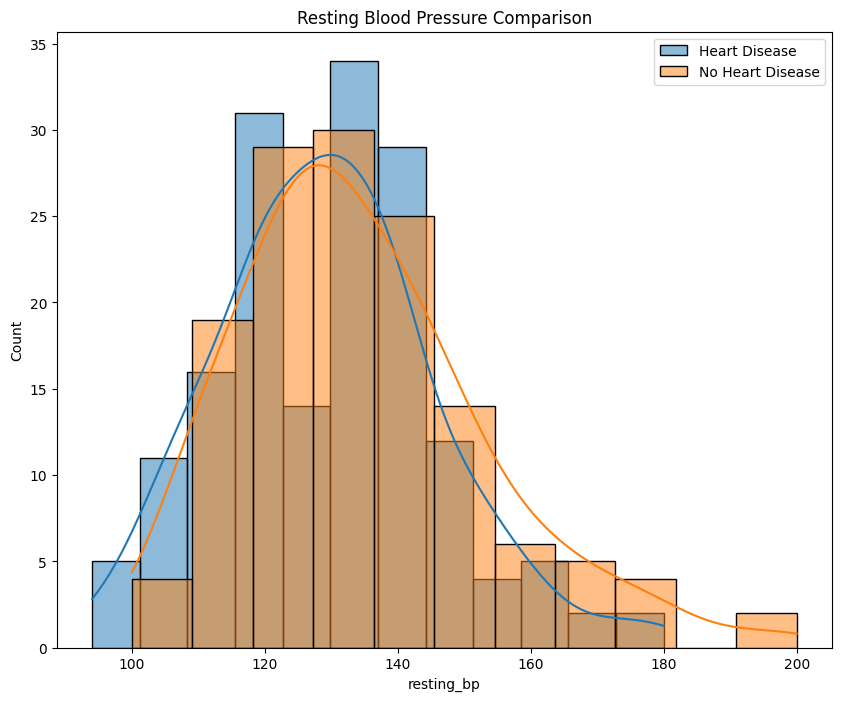

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(with_heart_disease['resting_bp'], label='Heart Disease', kde=True)
sns.histplot(without_heart_disease['resting_bp'], label='No Heart Disease', kde=True)
plt.title('Resting Blood Pressure Comparison')
plt.legend()
plt.show()

The figure alongside shows the number of individuals in each range of resting blood pressures (Systolic). The presence/absence of heart disease affects the normal resting blood pressure of individuals. There is a high count of people having heart disease and elevated blood pressures. It can be noticed that individuals with heart disease are less likely to have a normal resting blood pressure which is between 120-129.

In [ ]:
t_stat, p_value = ttest_ind(with_heart_disease['resting_bp'], without_heart_disease['resting_bp'])
print(f"T-test for Resting BP - T-statistic: {t_stat}, P-value: {p_value}")

T-test for Resting BP - T-statistic: -2.5412927171039, P-value: 0.011546059200233312


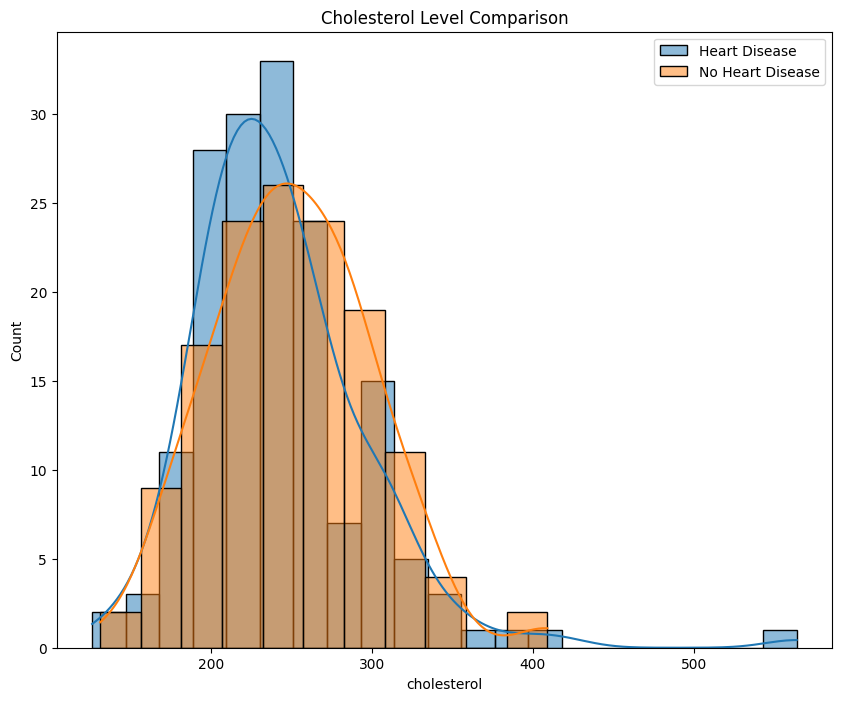

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(with_heart_disease['cholesterol'], label='Heart Disease', kde=True)
sns.histplot(without_heart_disease['cholesterol'], label='No Heart Disease', kde=True)
plt.title('Cholesterol Level Comparison')
plt.legend()
plt.show()

The graph represents the relationship between cholesterol and heart diseases. The graphs shows most of the data points in the dataset lie towards the center of the bell shape. Individuals with heart disease often have higher levels of cholesterol while individuals without heart disease tend to have lower levels of cholesterol.

In [ ]:
t_stat, p_value = ttest_ind(with_heart_disease['cholesterol'], without_heart_disease['cholesterol'])
print(f"T-test for Cholesterol - T-statistic: {t_stat}, P-value: {p_value}")

T-test for Cholesterol - T-statistic: -1.4842450762526977, P-value: 0.13879032695600638


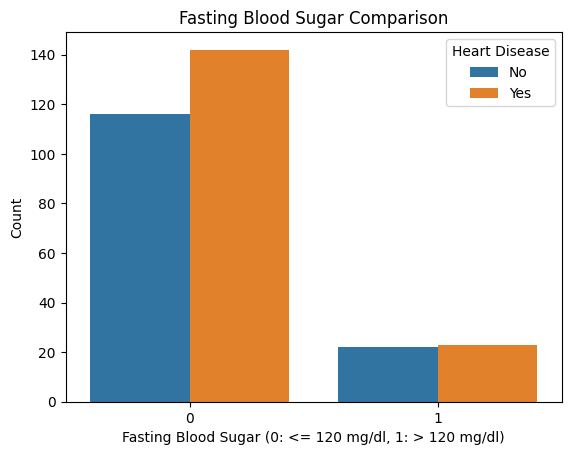

In [ ]:
# Compare fasting blood sugar between groups
# Plot a bar chart
sns.countplot(x='fasting_blood_sugar', hue='heart_disease', data=heart_df)
plt.title('Fasting Blood Sugar Comparison')
plt.xlabel('Fasting Blood Sugar (0: <= 120 mg/dl, 1: > 120 mg/dl)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

This grouped bar-chart allows us to see the distribution of heart disease cases based on fasting blood sugar levels The pattern suggests that there might be a higher incidence of heart disease in individuals with fasting blood sugar level 0 compared to those with fasting blood sugar level 1

In [ ]:
t_stat, p_value = ttest_ind(with_heart_disease['fasting_blood_sugar'], without_heart_disease['fasting_blood_sugar'])
print(f"T-test for Fasting Blood Sugar - T-statistic: {t_stat}, P-value: {p_value}")


T-test for Fasting Blood Sugar - T-statistic: -0.4867672297122193, P-value: 0.6267775474340549


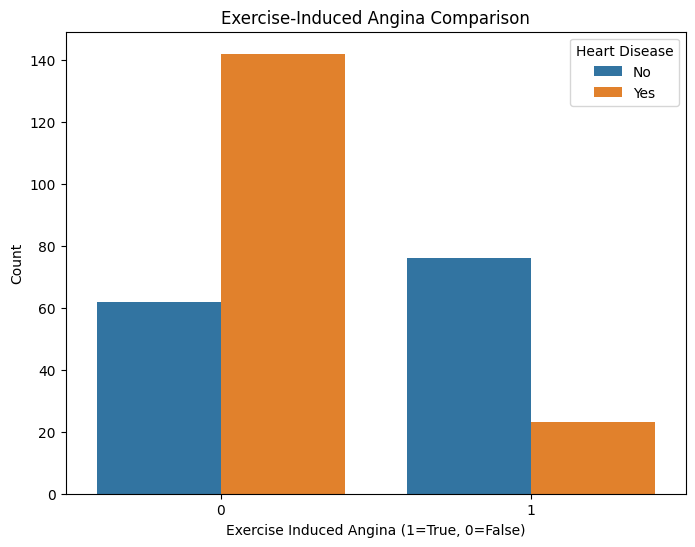

In [ ]:
# Compare exercise-induced angina between groups
plt.figure(figsize=(8, 6))
sns.countplot(x='exng', hue='heart_disease', data=heart_df)
plt.title('Exercise-Induced Angina Comparison')
plt.xlabel('Exercise Induced Angina (1=True, 0=False)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

The bar chart illustrates the relationship between the presence of exercise-induced angina and the incidence of heart disease The data suggests that individuals with exercise-induced angina (exng=1) are less likely to have heart disease (heart_disease=1) compared to those without exercise-induced angina (exng=0)

In [ ]:
t_stat, p_value = ttest_ind(with_heart_disease['exng'], without_heart_disease['exng'])
print(f"T-test for Exercise-Induced Angina - T-statistic: {t_stat}, P-value: {p_value}")

T-test for Exercise-Induced Angina - T-statistic: -8.423327027748353, P-value: 1.5208138383313965e-15


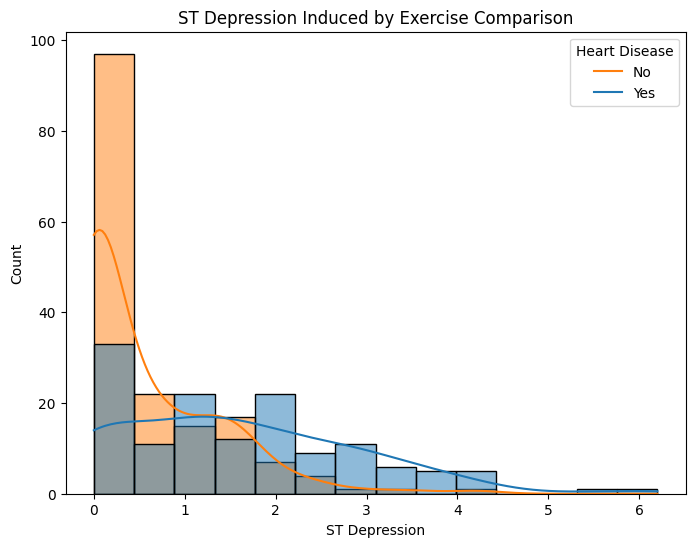

In [ ]:
# Compare ST depression induced by exercise between groups
plt.figure(figsize=(8, 6))
sns.histplot(data=heart_df, x='oldpeak', hue='heart_disease', kde=True)
plt.title('ST Depression Induced by Exercise Comparison')
plt.xlabel('ST Depression')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


The histogram shows the distribution of oldpeak values for both groups. Individuals with heart disease tend to have a higher number of cases with an old peak indicating a pattern where a substantial number of individuals with heart disease have no ST depression induced by exercise relative to rest.

In [ ]:
# Perform T-test for ST depression induced by exercise
t_stat, p_value = ttest_ind(with_heart_disease['oldpeak'], without_heart_disease['oldpeak'])
print(f"T-test for ST Depression Induced by Exercise - T-statistic: {t_stat}, P-value: {p_value}")


T-test for ST Depression Induced by Exercise - T-statistic: -8.279579663866222, P-value: 4.085346391354627e-15


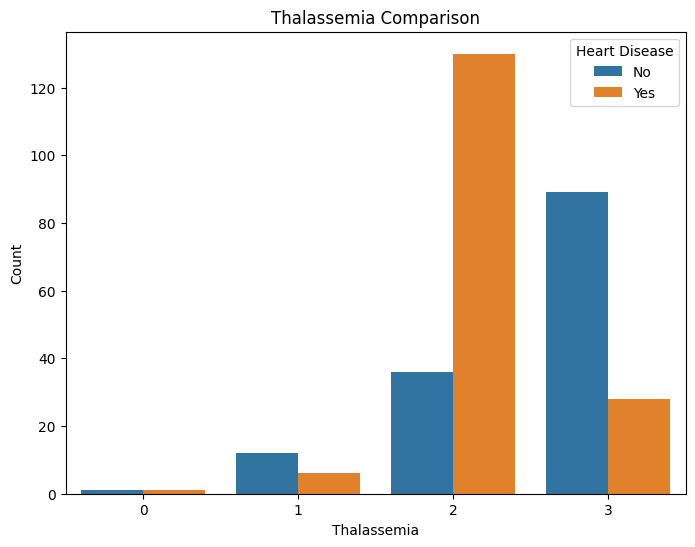

In [ ]:
# Compare thalassemia between groups
plt.figure(figsize=(8, 6))
sns.countplot(x='thalassemia', hue='heart_disease', data=heart_df)
plt.title('Thalassemia Comparison')
plt.xlabel('Thalassemia')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

The histogram suggest that the presence and type of thalassemia could be associated with varying risks of heart disease. Individuals with Type 0,1 and 3 thalassemia have a lower prevalence of heart disease compared to other thalassemia types. Individuals with Type 2 thalassemia may have an increased risk of heart disease.

From the given data we can figure out the most important features or factors that are the main causes for a cardiovascular disease.

---

Here we are using the correlation concept in order to check which factor plays the most important role in a heart disease.


In [ ]:
# Calculate correlation coefficients with the target variable
correlation_with_target = heart_df.corr()['heart_disease'].sort_values(ascending=False)
print(correlation_with_target)

heart_disease          1.000000
chest_pain             0.433798
thalachh               0.421741
slope                  0.345877
rest_ecg               0.137230
fasting_blood_sugar   -0.028046
cholesterol           -0.085239
resting_bp            -0.144931
age                   -0.225439
sex                   -0.280937
thalassemia           -0.344029
num_major_vessels     -0.391724
oldpeak               -0.430696
exng                  -0.436757
Name: heart_disease, dtype: float64


As seen, chest pain and thalach(maximum heart rate) plays a major role, after which comes 'rest_ecg' followed by, fasting blood sugar and cholesterol.


PART 2 : CORRELATION BETWEEN AGE AND CHOLESTEROL

In [ ]:
# Calculate correlation coefficient between 'cholesterol' and 'age'
from scipy import stats

pearson_corr, p_value = stats.pearsonr(heart_df['age'], heart_df['cholesterol'])
print(f'The pearson correlation coeffient for age and cholesterol is {round(pearson_corr, 3)}')
print(f'The p-value is {(p_value)}')

The pearson correlation coeffient for age and cholesterol is 0.214
The p-value is 0.00017862864341448777


***OUTCOME***







As we can see the Correlation coefficient is 0.21 as it indicates a positive correlation, hence has a wear postive linear bond.

The p-value is really close to 0, indicating that the if a null hypothesis was supposed to be tested here then it would be most probably rejected.



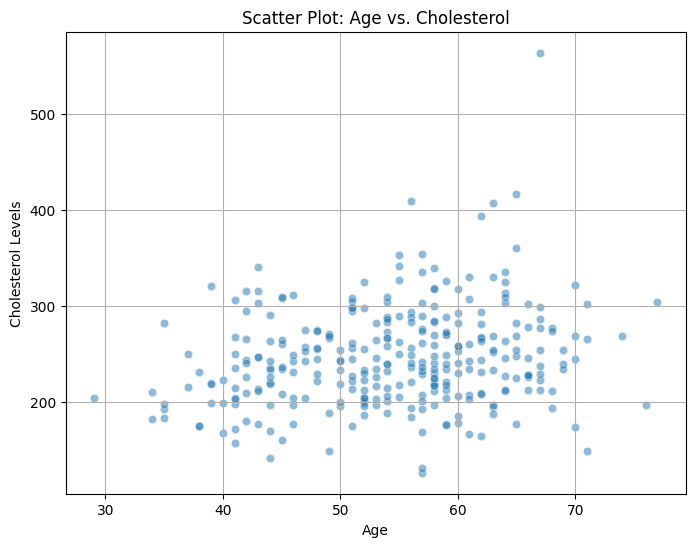

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='cholesterol', data=heart_df, alpha=0.5)
plt.title('Scatter Plot: Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.grid(True)
plt.show()


PART 3 : USING HYPOTHESIS TESTING TO CHECK IF THERE IS A SIGNIFICANT DIFFERENCE IN MAXIMUM HEART RATE BETWEEN INDIVIDUALS WITH AND WITHOUT HEART DISEASE.

Null Hypothesis (H0): There is no significant difference in maximum heart rate achieved between individuals with and without heart disease.

Alternative Hypothesis (H1): There is a significant difference in maximum heart rate achieved between individuals with and without heart disease

In [ ]:
patient_with_heartDisease = heart_df[heart_df['heart_disease'] == 1]['thalachh']
patient_without_heartDisease = heart_df[heart_df['heart_disease'] == 0]['thalachh']
t_stats, pvalue = ttest_ind(patient_with_heartDisease, patient_without_heartDisease)

In [ ]:
print(f't statistics: {t_stats}')
print(f'p value: {pvalue}')

t statistics: 8.069702869452568
p value: 1.697337638656049e-14


In [ ]:
alpha_value= 0.05
if pvalue < alpha_value:
    print("Reject the null hypothesis. There is a significant difference in maximum heart rate achieved between individuals with and without heart disease.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in maximum heart rate achieved between individuals with and without heart disease.")

Reject the null hypothesis. There is a significant difference in maximum heart rate achieved between individuals with and without heart disease.


Since p-value is less than the alpha value, we reject the null hypothesis. Hence we conclude that there is a significant difference in maximum heart rate achieved between individuals with and without heart disease.

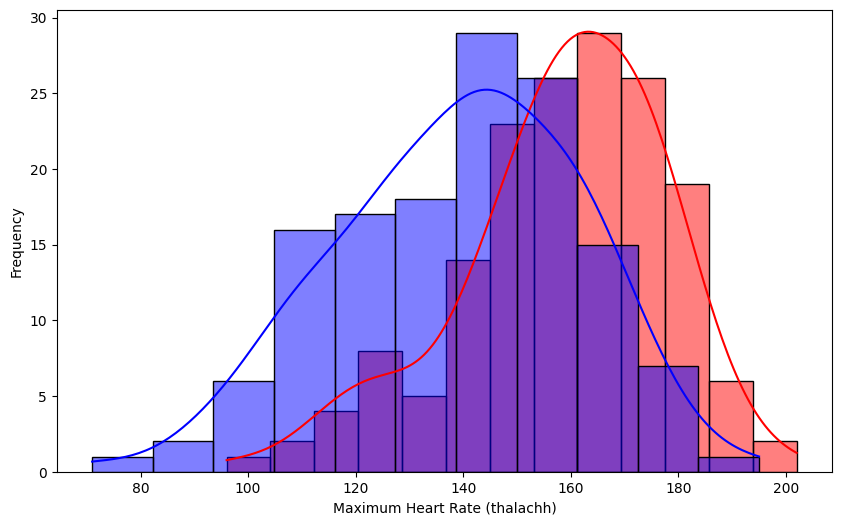

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='thalachh', data=heart_df[heart_df['heart_disease'] == 1], kde=True, color='red', label='With Heart Disease', alpha=0.5)
sns.histplot(x='thalachh', data=heart_df[heart_df['heart_disease'] == 0], kde=True, color='blue', label='Without Heart Disease', alpha=0.5)
plt.xlabel('Maximum Heart Rate (thalachh)')
plt.ylabel('Frequency')
plt.show()

**CONCLUSION:**

* Factors that majorly affect heart
diseases according to the data
provided to us are:

1. chest pain

2. thalachh

3. slope

4. rest ecg

(The above factors are listed in the decreasing order of their importance.)

* Correlation between age and cholesterol is a positive linear correlation.

* As tested above, there is a significant difference in maximum heart rate achieved between individuals with and without heart disease.

